In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier

In [2]:
iowatrain = pd.read_csv('./datasets/train.csv')

In [3]:
iowatrain.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
0       IR1          Lvl  ...            0         0     NaN   NaN   
1       IR1          Lvl  ...            0         0     NaN   NaN   
2       Reg          Lvl  ...            0         0     NaN   NaN   
3       Reg          Lvl  ...            0         0     NaN   NaN   
4       IR1          Lvl  ...            0         0     NaN   NaN   

  Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
0          NaN        0       3    2010        WD      130500  
1          NaN        0       4    2009        WD      220000  
2          NaN        0       1    2010        WD      109000  
3          NaN        0       4    2010        WD      174000  
4          NaN        0       3    2010        WD      138500  

[5 rows x 81 columns]

In [4]:
iowatrain.isnull().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    330
               ... 
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
SalePrice         0
Length: 81, dtype: int64

In [5]:
iowatrain.describe().T

count          mean           std          min          25%  \
Id               2051.0  1.474034e+03  8.439808e+02          1.0        753.5   
PID              2051.0  7.135900e+08  1.886918e+08  526301100.0  528458140.0   
MS SubClass      2051.0  5.700878e+01  4.282422e+01         20.0         20.0   
Lot Frontage     1721.0  6.905520e+01  2.326065e+01         21.0         58.0   
Lot Area         2051.0  1.006521e+04  6.742489e+03       1300.0       7500.0   
Overall Qual     2051.0  6.112140e+00  1.426271e+00          1.0          5.0   
Overall Cond     2051.0  5.562165e+00  1.104497e+00          1.0          5.0   
Year Built       2051.0  1.971709e+03  3.017789e+01       1872.0       1953.5   
Year Remod/Add   2051.0  1.984190e+03  2.103625e+01       1950.0       1964.5   
Mas Vnr Area     2029.0  9.969591e+01  1.749631e+02          0.0          0.0   
BsmtFin SF 1     2050.0  4.423005e+02  4.612041e+02          0.0          0.0   
BsmtFin SF 2     2050.0  4.795902e+01  1.650009e+02          0.0          0.0   
Bsmt Unf SF      2050.0  5.677283e+02  4.449548e+02          0.0        220.0   
Total Bsmt SF    2050.0  1.057988e+03  4.494107e+02          0.0        793.0   
1st Flr SF       2051.0  1.164488e+03  3.964469e+02        334.0        879.5   
2nd Flr SF       2051.0  3.293291e+02  4.256710e+02          0.0          0.0   
Low Qual Fin SF  2051.0  5.512921e+00  5.106887e+01          0.0          0.0   
Gr Liv Area      2051.0  1.499330e+03  5.004478e+02        334.0       1129.0   
Bsmt Full Bath   2049.0  4.275256e-01  5.226732e-01          0.0          0.0   
Bsmt Half Bath   2049.0  6.344558e-02  2.517052e-01          0.0          0.0   
Full Bath        2051.0  1.577279e+00  5.492794e-01          0.0          1.0   
Half Bath        2051.0  3.710385e-01  5.010427e-01          0.0          0.0   
Bedroom AbvGr    2051.0  2.843491e+00  8.266183e-01          0.0          2.0   
Kitchen AbvGr    2051.0  1.042906e+00  2.097900e-01          0.0          1.0   
TotRms AbvGrd    2051.0  6.435885e+00  1.560225e+00          2.0          5.0   
Fireplaces       2051.0  5.909313e-01  6.385163e-01          0.0          0.0   
Garage Yr Blt    1937.0  1.978708e+03  2.544109e+01       1895.0       1961.0   
Garage Cars      2050.0  1.776585e+00  7.645374e-01          0.0          1.0   
Garage Area      2050.0  4.736717e+02  2.159346e+02          0.0        319.0   
Wood Deck SF     2051.0  9.383374e+01  1.285494e+02          0.0          0.0   
Open Porch SF    2051.0  4.755680e+01  6.674724e+01          0.0          0.0   
Enclosed Porch   2051.0  2.257192e+01  5.984511e+01          0.0          0.0   
3Ssn Porch       2051.0  2.591419e+00  2.522961e+01          0.0          0.0   
Screen Porch     2051.0  1.651146e+01  5.737420e+01          0.0          0.0   
Pool Area        2051.0  2.397855e+00  3.778257e+01          0.0          0.0   
Misc Val         2051.0  5.157435e+01  5.733940e+02          0.0          0.0   
Mo Sold          2051.0  6.219893e+00  2.744736e+00          1.0          4.0   
Yr Sold          2051.0  2.007776e+03  1.312014e+00       2006.0       2007.0   
SalePrice        2051.0  1.814697e+05  7.925866e+04      12789.0     129825.0   

                         50%           75%          max  
Id                    1486.0  2.198000e+03       2930.0  
PID              535453200.0  9.071801e+08  924152030.0  
MS SubClass             50.0  7.000000e+01        190.0  
Lot Frontage            68.0  8.000000e+01        313.0  
Lot Area              9430.0  1.151350e+04     159000.0  
Overall Qual             6.0  7.000000e+00         10.0  
Overall Cond             5.0  6.000000e+00          9.0  
Year Built            1974.0  2.001000e+03       2010.0  
Year Remod/Add        1993.0  2.004000e+03       2010.0  
Mas Vnr Area             0.0  1.610000e+02       1600.0  
BsmtFin SF 1           368.0  7.337500e+02       5644.0  
BsmtFin SF 2             0.0  0.000000e+00       1474.0  
Bsmt Unf SF            

In [6]:
iowatrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [7]:
iowatrain.drop('Id', axis = 1, inplace=True) #Don't need this. 

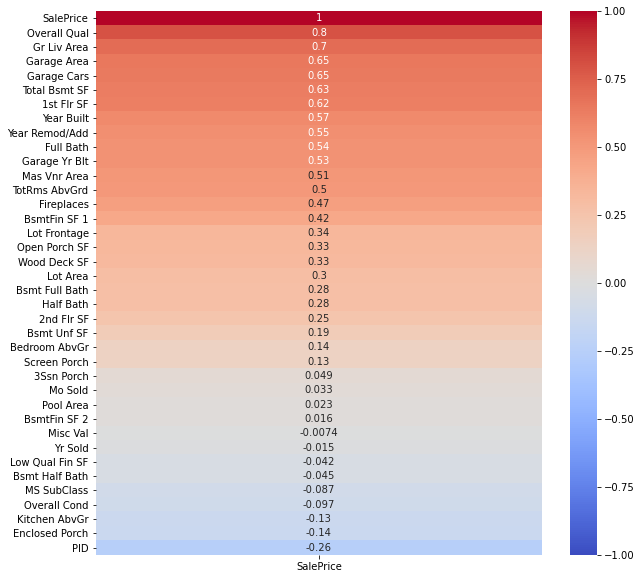

In [8]:
fig, ax = plt.subplots(figsize=(10,10))  # Sample figsize in inches

sns.heatmap(iowatrain.corr()[['SalePrice']].sort_values(
                                                        by='SalePrice', 
                                                        ascending=False),
            annot=True, vmin=-1, vmax=1,
           cmap='coolwarm', ax=ax);

# https://stackoverflow.com/questions/38913965/make-the-size-of-a-heatmap-bigger-with-seaborn
# This is a link that showed me how to get my heatmap bigger!

# Important to note that the heat map only shows corrrelations 
# with numerical columns. 

# I"MA HAVE TO GET DUMB!! I also need to make sure to remove outliners from ones I want

In [9]:
iowatrain["Bsmt Cond"].fillna('NA', inplace=True)
iowatrain['Bsmt Qual'].fillna('NA', inplace=True)
iowatrain['Bsmt Exposure'].fillna('NA', inplace=True)
iowatrain['BsmtFin Type 1'].fillna('NA', inplace=True)
iowatrain['BsmtFin Type 2'].fillna('NA', inplace=True)

iowatrain['Fireplace Qu'].fillna('NA', inplace=True)
iowatrain['Garage Finish'].fillna('NA', inplace=True)
iowatrain['Garage Qual'].fillna('NA', inplace=True)
iowatrain['Garage Cond'].fillna('NA', inplace=True)
iowatrain['Pool QC'].fillna('NA', inplace=True)
iowatrain['Fence'].fillna('NA', inplace=True)

In [10]:
# This is a reeeeeeeeeeeeallllly big data set. Let's rethink this.
# How about we take all the ordinal variables and make them ranked! 
ordinalcols = [ 'Lot Shape', 'Utilities' , 'Land Slope', 'Exter Qual',
               'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 
               'BsmtFin Type 1', 'BsmtFin Type 2' , 'Heating QC',
               'Electrical', 'Kitchen Qual' , "Functional", 
               'Fireplace Qu', 'Garage Finish','Garage Qual', 
               'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence' ]
# ordinal_df = iowatrain[ordinalcols]

# ordinal_df.columns = [x.lower() for x in ordinal_df.columns]
# ordinal_df.columns = [x.strip().replace(' ', '_') for x in ordinal_df.columns]
iowatrain.columns = [x.lower() for x in iowatrain.columns]
iowatrain.columns = [x.strip().replace(' ', '_') for x in iowatrain.columns]
ordinalcols = [x.lower() for x in ordinalcols]
ordinalcols = [x.strip().replace(' ', '_') for x in ordinalcols]

In [11]:
# # I'm organizing these from good to bad, as best as I know. I'm not a realitor but hey -_O_-
# replist01 = ['Reg', 'IR1', 'IR2', 'IR3'] #LotShape
# replist02 = ['AllPub', 'NoSeWa', 'NoSewr'] #Utilities
# replist03 = ['Gtl',  'Mod', 'Sev'] #LandSlope
# replist04 = ['NA', 'Ex','Gd', 'TA', 'Fa', 'Po'] #ExtQual, ExtrCond, BsmtQual, BsmtCond,,HeatingQC, KitchenQual:
#                                                #FireplaceQu, GarageQual, GarageCond, PoolQC,  
# replist05 = ['Gd', 'Av', 'Mn', 'No', 'NA'] #Bsmt Exposure
# replist06 = ['NA', 'GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf'] #BsmtFinType1&2, 
# replist07 = ['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix'] #Electrical
# replist08 = ['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2', 'Sev', 'Sal'] #Functional(Home), 
# replist09 = ['NA', 'Fin', 'RFn', 'Unf'] # GarageFinish, 
# replist10 = ['Y', 'P', 'N'] #Paved Drive
# replist11 = ['NA', 'GdPrv', 'MnPrv', 'GdWo', 'MnWw'] #Fence

In [12]:
iowatrain.replace({
            'lot_shape': {'Reg':1 , 'IR1':2 , 'IR2':3 , 'IR3':4 },
            'utilities': {'AllPub':1, 'NoSeWa':2, 'NoSewr':3 },
            'land_slope': {'Gtl':1,  'Mod':2, 'Sev':3},
            'exter_qual': {'NA':0, 'Ex':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5},
            'exter_cond': {'NA':0, 'Ex':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5},
            'bsmt_qual':  {'NA':0, 'Ex':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5},
            'bsmt_cond':  {'NA':0, 'Ex':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5},
            'bsmt_exposure': {'NA': 0, 'Gd':1 , 'Av':2, 'Mn':3, 'No':4},
            'bsmtfin_type_1': {'NA':0, 'GLQ':1, 'ALQ':2, 'BLQ':3,
                                      'Rec':4, 'LwQ':5, 'Unf':6},
            'bsmtfin_type_2': {'NA':0, 'GLQ':1, 'ALQ':2, 'BLQ':3,
                                      'Rec':4, 'LwQ':5, 'Unf':6},
            'heating_qc': {'NA':0, 'Ex':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5},
            'electrical': {'SBrkr':1, 'FuseA':2, 'FuseF':3, 'FuseP':4, 'Mix':5},
            'kitchen_qual':  {'NA':0, 'Ex':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5},
            'functional':{'Typ':1, 'Min1':2, 'Min2':3, 'Mod':4, 
                                   'Maj1':5, 'Maj2':6, 'Sev':7, 'Sal':8 },
            'fireplace_qu':  {'NA':0, 'Ex':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5},
            'garage_finish': {'NA':0, 'Fin':1, 'RFn':2, 'Unf':3},
            'garage_qual':   {'NA':0, 'Ex':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5},
            'garage_cond':    {'NA':0, 'Ex':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5},
            'paved_drive':   {'Y':1, 'P':2, 'N':3},
            'pool_qc':   {'NA':0, 'Ex':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5},
            'fence':  {'NA':0, 'GdPrv':1, 'MnPrv':2, 'GdWo':3, 'MnWw':4}
            }, inplace=True)
#Okay The ordinal Values are now fixed and numbered!!!

In [17]:
iowatrain['alley'].fillna('NA', inplace=True)
iowatrain['mas_vnr_type'].fillna('NA', inplace=True)
iowatrain['garage_type'].fillna('NA', inplace=True)
iowatrain['misc_feature'].fillna('NA', inplace=True)

# HERE THERE IS ONLY ONE NULL VALUE FOR THESE, SO I'M USING THE MEAN SO NOT TO SQEW
# THE DATA.
iowatrain['garage_yr_blt'].fillna(iowatrain['garage_yr_blt'].mean(), inplace=True)
iowatrain['bsmtfin_sf_1'].fillna(iowatrain['bsmtfin_sf_1'].mean(), inplace=True)
iowatrain['bsmtfin_sf_2'].fillna(iowatrain['bsmtfin_sf_2'].mean(), inplace=True)
iowatrain['mas_vnr_area'].fillna(iowatrain['mas_vnr_area'].mean(), inplace=True)
iowatrain['bsmt_unf_sf'].fillna(iowatrain['bsmt_unf_sf'].mean(), inplace=True)
iowatrain['total_bsmt_sf'].fillna(iowatrain['total_bsmt_sf'].mean(), inplace=True)
iowatrain['bsmt_full_bath'].fillna(iowatrain['bsmt_full_bath'].mean(), inplace=True)
iowatrain['bsmt_half_bath'].fillna(iowatrain['bsmt_half_bath'].mean(), inplace=True)
iowatrain['garage_cars'].fillna(iowatrain['garage_cars'].mean(), inplace=True)
iowatrain['garage_area'].fillna(iowatrain['garage_area'].mean(), inplace=True)
# I don't know why there are no 0 values for lot_frontage, so I'm going to 
# assume that they have no lottage by a street. 
iowatrain['lot_frontage'].fillna(0, inplace= True)

In [18]:
numericalcols = [col for col in iowatrain.columns if iowatrain[col].dtype != 'O']
#These are all the columsn that have numerical values. Now includind the
# Ordinal and Continuous and Discrete numerically.

In [19]:
iowatrain[numericalcols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 59 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pid              2051 non-null   int64  
 1   ms_subclass      2051 non-null   int64  
 2   lot_frontage     2051 non-null   float64
 3   lot_area         2051 non-null   int64  
 4   lot_shape        2051 non-null   int64  
 5   utilities        2051 non-null   int64  
 6   land_slope       2051 non-null   int64  
 7   overall_qual     2051 non-null   int64  
 8   overall_cond     2051 non-null   int64  
 9   year_built       2051 non-null   int64  
 10  year_remod/add   2051 non-null   int64  
 11  mas_vnr_area     2051 non-null   float64
 12  exter_qual       2051 non-null   int64  
 13  exter_cond       2051 non-null   int64  
 14  bsmt_qual        2051 non-null   int64  
 15  bsmt_cond        2051 non-null   int64  
 16  bsmt_exposure    2051 non-null   int64  
 17  bsmtfin_type_1

In [20]:
iowatrain.columns

Index(['pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config',
       'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_type', 'garage_yr_blt', 'garage_finish'

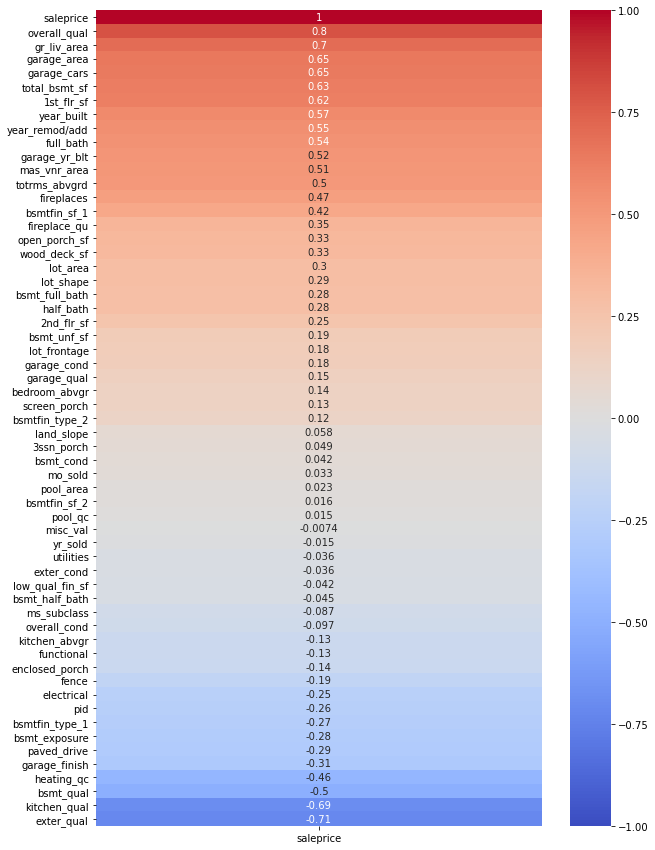

In [21]:
fig, ax = plt.subplots(figsize=(10,15))

sns.heatmap(iowatrain.corr()[['saleprice']].sort_values(by='saleprice', ascending=False),
            annot=True, vmin=-1, vmax=1,
           cmap='coolwarm', ax=ax);

In [22]:
iowatrain['ms_subclass'] = iowatrain['ms_subclass'].astype(str)

In [23]:
# # Now I should go through and change the Nominal Values to be Dummy and   
# # make sure the Nominal values are not numerical unless dummied. 
# nominal = [ 'ms_subclass', 'ms_zoning', 'street', 'alley', 'land_contour', 'lot_config', 
#            'neighborhood', 'condition_1', 'condition_2', 'bldg_type', 'house_style',
#            'roof_style', 'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
#            'foundation', 'heating', 'central_air', 'garage_type', 'misc_feature', 'sale_type' ]


In [24]:
# iowatrain_dummy = pd.get_dummies(iowatrain[nominal], drop_first=True)

In [25]:
# for col in iowatrain_dummy.columns:
#     if iowatrain_dummy[col].isnull().sum() >0:
#         print(col) 
# # no nulls. 
# iowatrain_dummy.head()

In [26]:
# numerical_iowa = iowatrain.drop(nominal, axis = 1) # Getting only the numerical values!                                           

In [27]:
# Here I am poly fit transforming, to see if some of these have dependencies on each other. 
# poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False )
# numiowa_train_overfit = poly.fit_transform(numerical_iowatrain)
# polyfit_num_train = pd.DataFrame(numiowa_train_overfit)
# polyfit_num_train.shape

In [28]:
# iowatrain_clean = pd.concat([numerical_iowa , iowatrain_dummy], axis=1)

In [74]:
# iowatrain_clean.to_csv('./datasets/iowatrain_clean3.csv')

OK LETS RE-EVALUATE. WE ONLY NEED SOME DUMMIES. BUT WITCH ONES??

In [75]:
# for col in iowatrain_clean.columns:
#     if iowatrain_clean[col].isnull().sum() >0:
#         print(col) 

In [31]:
# plt.scatter(x = iowatrain_clean['gr_liv_area'], y= iowatrain_clean['saleprice'])
#got to go and drop the outliners! gUNNA SORT OUT THE NUMERICALS AFTER i CLEAN THE DUMMYS. 

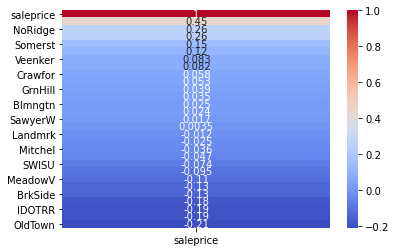

In [30]:
dumheat = pd.get_dummies(iowatrain['neighborhood'])
dumheat['saleprice'] = iowatrain['saleprice']

sns.heatmap(dumheat.corr()[['saleprice']].sort_values(by='saleprice', ascending=False),
           annot = True, cmap='coolwarm')

# sns.heatmap(iowatrain.corr()[['saleprice']].sort_values(by='saleprice', ascending=False),
#             annot=True, vmin=-1, vmax=1,
#            cmap='coolwarm', ax=ax);

In [34]:
dumheat.corr()[['saleprice']].sort_values(by='saleprice', ascending=False)

saleprice
saleprice   1.000000
NridgHt     0.448647
NoRidge     0.263395
StoneBr     0.256977
Somerst     0.150078
Timber      0.116400
Veenker     0.083186
CollgCr     0.082309
Crawfor     0.058386
ClearCr     0.052503
GrnHill     0.038848
NWAmes      0.034926
Blmngtn     0.024900
Gilbert     0.023974
SawyerW     0.016708
Greens      0.003476
Landmrk    -0.012395
Blueste    -0.025226
Mitchel    -0.035574
NPkVill    -0.047296
SWISU      -0.074214
BrDale     -0.095305
MeadowV    -0.111558
Sawyer     -0.133692
BrkSide    -0.134790
Edwards    -0.176119
IDOTRR     -0.189237
NAmes      -0.189387
OldTown    -0.208371

In [35]:
nicehood = ('NridgHt','NoRidge','StoneBr','Somerst',
    'Timber','Veenker','CollgCr','Crawfor','ClearCr')
okhood = ('Crawfor','ClearCr','GrnHill','NWAmes',
          'Blmngtn','Gilbert','SawyerW','Greens',
          'Landmrk','Blueste','Mitchel','NPkVill')	
badhood = ('SWISU','BrDale','MeadowV','Sawyer','BrkSide',
           'Edwards','IDOTRR','NAmes','OldTown')

In [36]:
nicehood_cor =[]
okhood_cor = []
badhood_cor = []
for col in dumheat.columns:
    if col != 'saleprice':
        if dumheat[col].corr(dumheat['saleprice']) > 0.05:
            nicehood_cor.append(dumheat[col].corr(dumheat['saleprice']))
        elif dumheat[col].corr(dumheat['saleprice']) < -0.05:
            badhood_cor.append(dumheat[col].corr(dumheat['saleprice']))
        else:
            okhood_cor.append(dumheat[col].corr(dumheat['saleprice']))

print(
    np.mean(nicehood_cor),
    np.mean(okhood_cor),
    np.mean(badhood_cor))


0.16798675372099847 0.0022341839293463775 -0.14585244112872248


In [160]:
# for col in dumheat.columns:
#     if col in nicehood:
#         dumheat[col] = np.mean(nicehood_cor)
# dumheat

Blmngtn  Blueste  BrDale  BrkSide   ClearCr   CollgCr   Crawfor  \
0           0        0       0        0  0.167987  0.167987  0.167987   
1           0        0       0        0  0.167987  0.167987  0.167987   
2           0        0       0        0  0.167987  0.167987  0.167987   
3           0        0       0        0  0.167987  0.167987  0.167987   
4           0        0       0        0  0.167987  0.167987  0.167987   
...       ...      ...     ...      ...       ...       ...       ...   
2046        0        0       0        0  0.167987  0.167987  0.167987   
2047        0        0       0        0  0.167987  0.167987  0.167987   
2048        0        0       0        0  0.167987  0.167987  0.167987   
2049        0        0       0        0  0.167987  0.167987  0.167987   
2050        0        0       0        0  0.167987  0.167987  0.167987   

      Edwards  Gilbert  Greens  ...   NridgHt  OldTown  SWISU  Sawyer  \
0           0        0       0  ...  0.167987        0      0       1   
1           0        0       0  ...  0.167987        0      0       0   
2           0        0       0  ...  0.167987        0      0       0   
3           0        0       0  ...  0.167987        0      0       0   
4           0        0       0  ...  0.167987        0      0       0   
...       ...      ...     ...  ...       ...      ...    ...     ...   
2046        0        0       0  ...  0.167987        0      0       0   
2047        1        0       0  ...  0.167987        0      0       0   
2048        0        0       0  ...  0.167987        0      0       0   
2049        0        0       0  ...  0.167987        0      0       0   
2050        0        1       0  ...  0.167987        0      0       0   

      SawyerW   Somerst   StoneBr    Timber   Veenker  saleprice  
0           0  0.167987  0.167987  0.167987  0.167987     130500  
1           1  0.167987  0.167987  0.167987  0.167987     220000  
2           0  0.167987  0.167987  0.167987  0.167987     109000  
3           0  0.167987  0.167987  0.167987  0.167987     174000  
4           1  0.167987  0.167987  0.167987  0.167987     138500  
...       ...       ...       ...       ...       ...        ...  
2046        0  0.167987  0.167987  0.167987  0.167987     298751  
2047        0  0.167987  0.167987  0.167987  0.167987      82500  
2048        0  0.167987  0.167987  0.167987  0.167987     177000  
2049        0  0.167987  0.167987  0.167987  0.167987     144000  
2050        0  0.167987  0.167987  0.167987  0.167987     189000  

[2051 rows x 29 columns]

In [44]:
[iowatrain['neighborhood'].replace(to_replace=col, value = 1, inplace=True) 
 for col in iowatrain['neighborhood'] if col in nicehood]

[iowatrain['neighborhood'].replace(to_replace=col, value = 2, inplace=True) 
 for col in iowatrain['neighborhood'] if col in okhood]

[iowatrain['neighborhood'].replace(to_replace=col, value = 3, inplace=True) 
 for col in iowatrain['neighborhood'] if col in badhood]
iowatrain

pid ms_subclass ms_zoning  lot_frontage  lot_area street alley  \
0     533352170          60        RL           0.0     13517   Pave    NA   
1     531379050          60        RL          43.0     11492   Pave    NA   
2     535304180          20        RL          68.0      7922   Pave    NA   
3     916386060          60        RL          73.0      9802   Pave    NA   
4     906425045          50        RL          82.0     14235   Pave    NA   
...         ...         ...       ...           ...       ...    ...   ...   
2046  921126030          20        RL          79.0     11449   Pave    NA   
2047  905377130          30        RL           0.0     12342   Pave    NA   
2048  909253010          50        RL          57.0      7558   Pave    NA   
2049  535179160          20        RL          80.0     10400   Pave    NA   
2050  527162130          60        RL          60.0      7500   Pave    NA   

      lot_shape land_contour  utilities  ... screen_porch  pool_area  pool_qc  \
0             2          Lvl          1  ...            0          0        0   
1             2          Lvl          1  ...            0          0        0   
2             1          Lvl          1  ...            0          0        0   
3             1          Lvl          1  ...            0          0        0   
4             2          Lvl          1  ...            0          0        0   
...         ...          ...        ...  ...          ...        ...      ...   
2046          2          HLS          1  ...            0          0        0   
2047          2          Lvl          1  ...            0          0        0   
2048          1          Bnk          1  ...            0          0        0   
2049          1          Lvl          1  ...            0          0        0   
2050          1          Lvl          1  ...            0          0        0   

     fence misc_feature misc_val mo_sold  yr_sold  sale_type  saleprice  
0        0           NA        0       3     2010        WD      130500  
1        0           NA        0       4     2009        WD      220000  
2        0           NA        0       1     2010        WD      109000  
3        0           NA        0       4     2010        WD      174000  
4        0           NA        0       3     2010        WD      138500  
...    ...          ...      ...     ...      ...        ...        ...  
2046     0           NA        0       1     2008        WD      298751  
2047     0           NA        0       3     2009        WD       82500  
2048     0           NA        0       3     2009        WD      177000  
2049     0           NA        0      11     2009        WD      144000  
2050     0           NA        0       6     2010        WD      189000  

[2051 rows x 80 columns]

In [38]:
iowatrain['neighborhood']

0        Sawyer
1       SawyerW
2         NAmes
3        Timber
4       SawyerW
         ...   
2046     Timber
2047    Edwards
2048    Crawfor
2049      NAmes
2050    Gilbert
Name: neighborhood, Length: 2051, dtype: object

In [76]:
# HAHAHHAHA YES FINALLLY WE CAN GO ON! #############################################################

In [78]:
# features = 
# Here I am removing items I don't want to include in my test

X = iowatrain_clean.drop(['saleprice', 
                          'lot_frontage' , 'mas_vnr_area' , 
                          'garage_yr_blt', 'pid'], axis = 1)

y = iowatrain_clean['saleprice']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Columns: 208 entries, lot_area to sale_type_WD 
dtypes: float64(8), int64(45), uint8(155)
memory usage: 1.1 MB


In [79]:
lr = LinearRegression()
sc = StandardScaler()
# poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False )
# X_overfit = poly.fit_transform(X)

In [80]:
# X_overfit.shape

In [81]:
X_train, X_test, y_train, y_test = train_test_split( X, 
                                                    y, 
                                                    train_size=0.8,
                                                    random_state=42)

In [82]:
Z_train = sc.fit_transform(X_train)
Z_test = sc.fit_transform(X_test)

In [83]:
# Instantiate.
ridge_model = Ridge(alpha=10)

# Fit.
ridge_model.fit(Z_train, y_train)

# Evaluate model using R2.
print(ridge_model.score(Z_train, y_train))
print(ridge_model.score(Z_test, y_test))

0.9249610696041054
0.880476845611328


In [84]:
print(Z_train.shape)
print(Z_test.shape)

(1640, 208)
(411, 208)


In [85]:
# lr.fit(Z_train, y_train)
# lr.score(Z_test, y_test)
# lr.score(Z_train, y_train)

In [86]:
#################################################################################################################################

In [87]:
iowatest = pd.read_csv('./datasets/test.csv')

In [88]:
iowatest.isnull().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    160
               ... 
Misc Feature    837
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
Length: 80, dtype: int64

In [89]:
iowatest["Bsmt Cond"].fillna('NA', inplace=True)
iowatest['Bsmt Qual'].fillna('NA', inplace=True)
iowatest['Bsmt Exposure'].fillna('NA', inplace=True)
iowatest['BsmtFin Type 1'].fillna('NA', inplace=True)
iowatest['BsmtFin Type 2'].fillna('NA', inplace=True)
iowatest['Electrical'].fillna(0, inplace=True)
iowatest['Fireplace Qu'].fillna('NA', inplace=True)
iowatest['Garage Finish'].fillna('NA', inplace=True)
iowatest['Garage Qual'].fillna('NA', inplace=True)
iowatest['Garage Cond'].fillna('NA', inplace=True)
iowatest['Pool QC'].fillna('NA', inplace=True)
iowatest['Fence'].fillna('NA', inplace=True)

In [90]:
iowatest.columns = [x.lower() for x in iowatest.columns]
iowatest.columns = [x.strip().replace(' ', '_') for x in iowatest.columns]

In [91]:
iowatest['ms_subclass'] = iowatest['ms_subclass'].astype(str)

In [92]:
iowatest.replace({
            'lot_shape': {'Reg':1 , 'IR1':2 , 'IR2':3 , 'IR3':4 },
            'utilities': {'AllPub':1, 'NoSeWa':2, 'NoSewr':3 },
            'land_slope': {'Gtl':1,  'Mod':2, 'Sev':3},
            'exter_qual': {'NA':0, 'Ex':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5},
            'exter_cond': {'NA':0, 'Ex':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5},
            'bsmt_qual':  {'NA':0, 'Ex':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5},
            'bsmt_cond':  {'NA':0, 'Ex':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5},
            'bsmt_exposure': {'NA': 0, 'Gd':1 , 'Av':2, 'Mn':3, 'No':4},
            'bsmtfin_type_1': {'NA':0, 'GLQ':1, 'ALQ':2, 'BLQ':3,
                                      'Rec':4, 'LwQ':5, 'Unf':6},
            'bsmtfin_type_2': {'NA':0, 'GLQ':1, 'ALQ':2, 'BLQ':3,
                                      'Rec':4, 'LwQ':5, 'Unf':6},
            'heating_qc': {'NA':0, 'Ex':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5},
            'electrical': {'SBrkr':1, 'FuseA':2, 'FuseF':3, 'FuseP':4, 'Mix':5},
            'kitchen_qual':  {'NA':0, 'Ex':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5},
            'functional':{'Typ':1, 'Min1':2, 'Min2':3, 'Mod':4, 
                                   'Maj1':5, 'Maj2':6, 'Sev':7, 'Sal':8 },
            'fireplace_qu':  {'NA':0, 'Ex':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5},
            'garage_finish': {'NA':0, 'Fin':1, 'RFn':2, 'Unf':3},
            'garage_qual':   {'NA':0, 'Ex':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5},
            'garage_cond':    {'NA':0, 'Ex':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5},
            'paved_drive':   {'Y':1, 'P':2, 'N':3},
            'pool_qc':   {'NA':0, 'Ex':1,'Gd':2, 'TA':3, 'Fa':4, 'Po':5},
            'fence':  {'NA':0, 'GdPrv':1, 'MnPrv':2, 'GdWo':3, 'MnWw':4}
            }, inplace=True)

In [93]:
numerical_iowa_TEST = iowatest.drop(nominal, axis = 1) # Getting only the numerical values! 

# numerical_iowaTEST = numerical_iowa_1.drop([ 'lot_frontage' , 'mas_vnr_area' , 
#                                              'garage_yr_blt', 'pid'], axis = 1)
# # Here I am removing items I don't want to include in my test and polytransform.
                                          

# # Here I am poly fit transforming, to see if some of these have dependencies on each other. 
# poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False )

# numiowa_TEST_overfit = poly.fit_transform(numerical_iowaTEST)
# polyfit_num_TEST = pd.DataFrame(numiowa_TEST_overfit)
# polyfit_num_TEST.shape

In [94]:
iowatest_dummy = pd.get_dummies(iowatest[nominal], drop_first=True)

In [101]:
for col in iowatest_dummy.columns:
    if iowatest_dummy[col].isnull().sum() >0:
        print(col) 
# no nulls. 
iowatest_dummy.shape

(878, 140)

In [96]:
iowatest_clean = pd.concat([numerical_iowa_TEST , iowatest_dummy], axis=1)



In [97]:
for col in polyfit_num_TEST.columns:
    if polyfit_num_TEST[col].isnull().sum() >0:
        print(col)

In [98]:
XX = iowatest_clean.drop(['lot_frontage' , 'mas_vnr_area' , 'garage_yr_blt', 'pid'], axis = 1)


# iowatest[numericalcols2].info()
# We have extra null values in a few columns ( lot_frontage , mas_vnr_area , garage_yr_blt )
# We will have to remove these values from the test before we fit it I think. 
# Might as well take 'pid' out too.

# XX_overfit = poly.fit_transform(XX)

In [99]:
# XX = iowatest[numericalcols2]
# XX.isnull().sum()
XX_test = sc.fit_transform(XX)
# ridge_model.predict()
XX_test.shape

(878, 194)

In [100]:
ridge_model.predict(XX_test);

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 208 is different from 194)

In [ ]:
iowatest['saleprice'] = ridge_model.predict(XX_test)

In [ ]:
submission = iowatest[['id', 'saleprice']].copy()

In [ ]:
submission

In [ ]:
submission.to_csv('./datasets/submission_04.csv', index=False)

In [ ]:


#  HAVE TO MATCH THE COLUMNS OF MY DUMMY SET, BECAUSE I HAVE MORE OR LESS COLUMNS IN MY TRAIN SET THAN TEST SET. 